<a href="https://colab.research.google.com/github/jisoopak0822-ctrl/jisoopak/blob/main/Amazon_Prime_Data_Analysis_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using Kaggle API to export Database**

In [ ]:
import os, shutil
os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 0o600)


In [ ]:
!kaggle datasets download -d shivamb/amazon-prime-movies-and-tv-shows

Dataset URL: https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows
License(s): CC0-1.0
  0% 0.00/1.61M [00:00<?, ?B/s]
100% 1.61M/1.61M [00:00<00:00, 577MB/s]


In [ ]:
!unzip amazon-prime-movies-and-tv-shows.zip -d prime_data

Archive:  amazon-prime-movies-and-tv-shows.zip
  inflating: prime_data/amazon_prime_titles.csv  


In [ ]:
import pandas as pd

df = pd.read_csv("prime_data/amazon_prime_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


# **Cleaning Data**

In [ ]:
# Clean up
df.shape
df.info()

#Rename titles of Columns
df.columns = df.columns.str.strip().str.replace('_', ' ').str.title()
df.rename(columns={'Listed In': 'Genre', 'Description': 'Summary'}, inplace=True)

#drop unwanted columns
df.drop(columns=['Show Id', 'Date Added', 'Cast', 'Country', 'Director'], inplace=True)

#Remove min from duration and replace seasons to N/A
x = lambda time: "N/A" if "Season" in str(time) else str(time).replace(" min", "")
df["Duration"] = df["Duration"].apply(x)

df.fillna({"Rating": "N/A"}, inplace=True)

#sort from latest release year to oldest
df.sort_values(by="Release Year", ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)


df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


,Type,Title,Release Year,Rating,Duration,Genre,Summary
0,TV Show,The Incredible Stories of Bimi Boo and Friends,2021,TV-G,N/A,"Action, Kids",For the curious puppy Bimi Boo the world is an...
1,Movie,Ester Steinberg: Burning Bush,2021,18+,54,"Arts, Entertainment, and Culture, Comedy, Spec...","In her postpartum pandemic special, comedian E..."
2,Movie,Go to School and Learn with Blippi,2021,ALL,47,Kids,Blippi is an educational kids show tailored fo...
3,Movie,White Night,2021,13+,87,Drama,"The film unfolds during Nuit Blanche, a massiv..."
4,Movie,Wild Fire,2021,16+,80,"Drama, Romance","Wild Fire is a drama about a young man, Ezie, ..."
...,...,...,...,...,...,...,...
9663,Movie,Robin Hood (Silent),1922,13+,121,Action,"Amid big-budget medieval pageantry, King Richa..."
9664,Movie,One Exciting Night,1922,13+,145,Suspense,"A young orphan girl, courted by an unpleasant ..."
9665,Movie,Within Our Gates,1920,13+,78,Drama,"Abandoned by her fiance, an educated negro wom..."
9666,Movie,Pollyanna,1920,NR,60,"Comedy, Drama, Kids","When Pollyanna is orphaned, she is sent to liv..."


# **Statistical Analysis**

In [ ]:
import numpy as np

# convert to numbers
df["Time"] = pd.to_numeric(df["Duration"], errors="coerce")

#total count
print( "Total Quantity Per Content Type\n",df["Type"].value_counts())
print("\n")

print("Total Quantity Per Rating\n",df["Rating"].value_counts())
print("\n")

# numeric summary
print("Numeric Summary of Duration\n",df[["Time"]].describe().loc[["min","mean","max","std"]])


# top genres
genres = df["Genre"].dropna().str.get_dummies(sep=", ").sum().sort_values(ascending=False)
print("\n")
print("Total Quantity Per Genre\n",genres)
print("\n")

#Average type by rating
print("Average type by rating:\n", df.groupby("Rating")["Type"].agg(lambda x: x.mode()[0]),"\n")



Total Quantity Per Content Type
 Type
Movie      7814
TV Show    1854
Name: count, dtype: int64


Total Quantity Per Rating
 Rating
13+         2117
16+         1547
ALL         1268
18+         1243
R           1010
PG-13        393
7+           385
N/A          337
PG           253
NR           223
TV-14        208
TV-PG        169
TV-NR        105
G             93
TV-G          81
TV-MA         77
TV-Y          74
TV-Y7         39
UNRATED       33
NC-17          3
NOT_RATE       3
AGES_18_       3
AGES_16_       2
ALL_AGES       1
16             1
Name: count, dtype: int64


Numeric Summary of Duration
             Time
min     0.000000
mean   91.311876
max   601.000000
std    40.333086


Total Quantity Per Genre
 Drama                        3687
Comedy                       2099
Action                       1657
Suspense                     1501
Kids                         1085
Documentary                   993
Special Interest              980
Horror                        875
R

# **Visualization via Matplotlib**

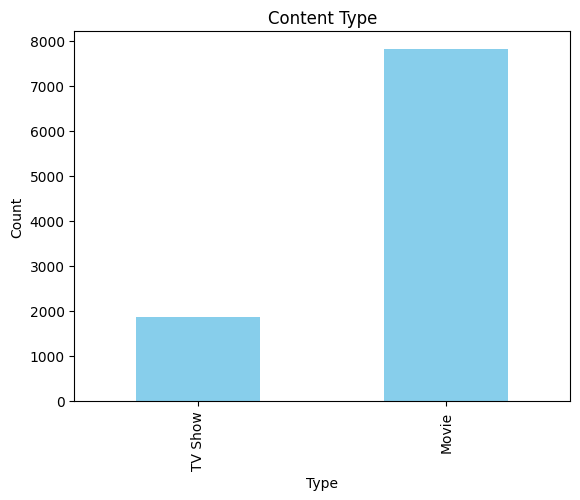

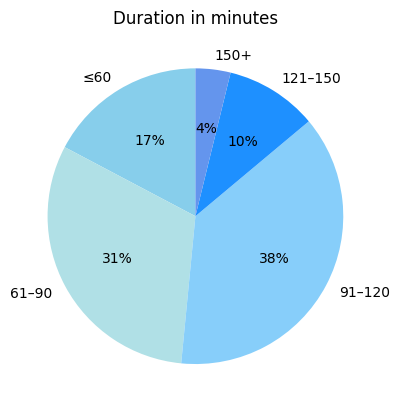

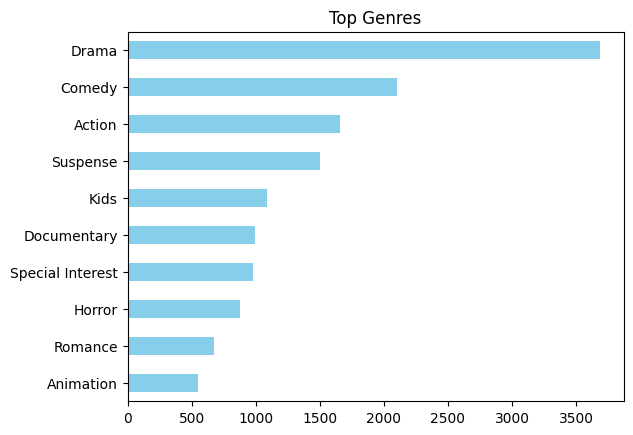

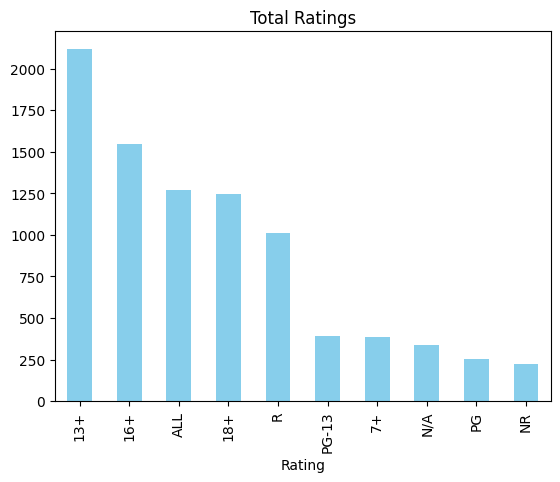

In [ ]:
# Visualization, plots
import matplotlib.pyplot as plt
plt.figure();df['Type'].fillna("N/A").value_counts().sort_values().plot.bar(color="skyblue"); plt.title("Content Type");plt.xlabel("Type");plt.ylabel("Count")
plt.figure();pd.cut(df['Time'].dropna(), [0,60,90,120,150,1_000], labels=['≤60','61–90','91–120','121–150','150+'], include_lowest=True).value_counts(sort=False).plot.pie(autopct='%1.0f%%', startangle=90, colors=['skyblue', 'powderblue', 'lightskyblue', 'dodgerblue', 'cornflowerblue', 'deepskyblue']); plt.title('Duration in minutes');plt.ylabel("")
plt.figure(); genres.sort_values(ascending=True).tail(10).plot.barh(color = "skyblue");plt.title("Top Genres")
plt.figure(); df['Rating'].fillna("N/A").value_counts().head(10).plot.bar(color = "skyblue");plt.title("Total Ratings");
plt.show()

# **Export the clean data to a database using sqlite**

In [ ]:
import sqlite3
conn = sqlite3.connect("Group 16 Amazon Prime Export.db")
df.to_sql("prime_titles", conn, if_exists="replace", index=False)
conn.close()

# **Testing the export data**

In [ ]:
conn = sqlite3.connect("amazon_prime.db")

check_df = pd.read_sql("SELECT * FROM prime_titles LIMIT 5;", conn)
conn.close()

check_df

,Type,Title,Release Year,Rating,Duration,Genre,Summary,Time
0,Movie,The Grand Seduction,2014,N/A,113,"Comedy, Drama",A small fishing village must procure a local d...,113.0
1,Movie,Take Care Good Night,2018,13+,110,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,110.0
2,Movie,Secrets of Deception,2017,N/A,74,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,74.0
3,Movie,Pink: Staying True,2014,N/A,69,Documentary,"Pink breaks the mold once again, bringing her ...",69.0
4,Movie,Monster Maker,1989,N/A,45,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,45.0
